# DATA ANALSYSIS
Loading and toying with the data set

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyddm
from pyddm import Model, Fittable, Fitted, Sample
from pyddm.models import Drift, Noise, Bound, Overlay, LossFunction
from pyddm.functions import fit_model
from pyddm.models import ICPointSourceCenter, InitialCondition, ICUniform
from pyddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNone, OverlayNonDecision, OverlayUniformMixture
from pyddm.plot import model_gui_jupyter
from scipy.stats import ttest_1samp

      subjects  S  prime  R        rt
361          1  0      1  1  0.369526
2617         1  0      1  1  0.695785
3013         1  1      1  1  0.749988
1117         1  1      0  0  0.372379
2257         1  0      0  0  0.351478


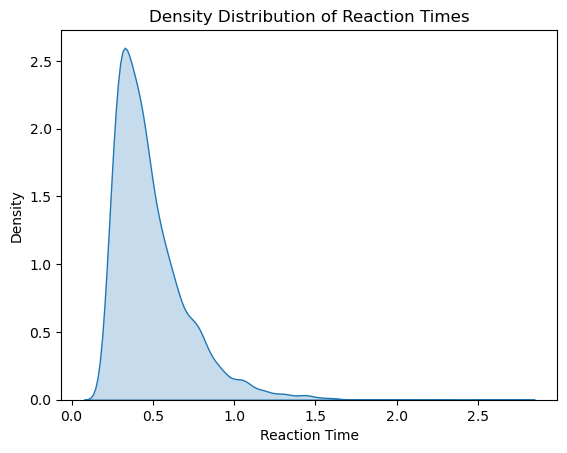

<Figure size 640x480 with 0 Axes>

In [122]:


# Load the dataset
df = pd.read_csv('dataset-23.tsv', sep='\t')

# Change categorical variables from 'dog' to 1 and 'cat' to 0 for columns 'R' and 'S'
df['R'] = df['R'].map({'dog': 1, 'cat': 0})
df['S'] = df['S'].map({'dog': 1, 'cat': 0})
# Replace 'WOOF' and 'MEOW' with 1 and 0 respectively in the 'prime' column
df['prime'] = df['prime'].replace({'WOOF': 1, 'MEOW': 0})

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Plot the density distribution of reaction times
sns.kdeplot(df['rt'], fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('Density Distribution of Reaction Times')
plt.show()
plt.savefig('reaction_times.png')

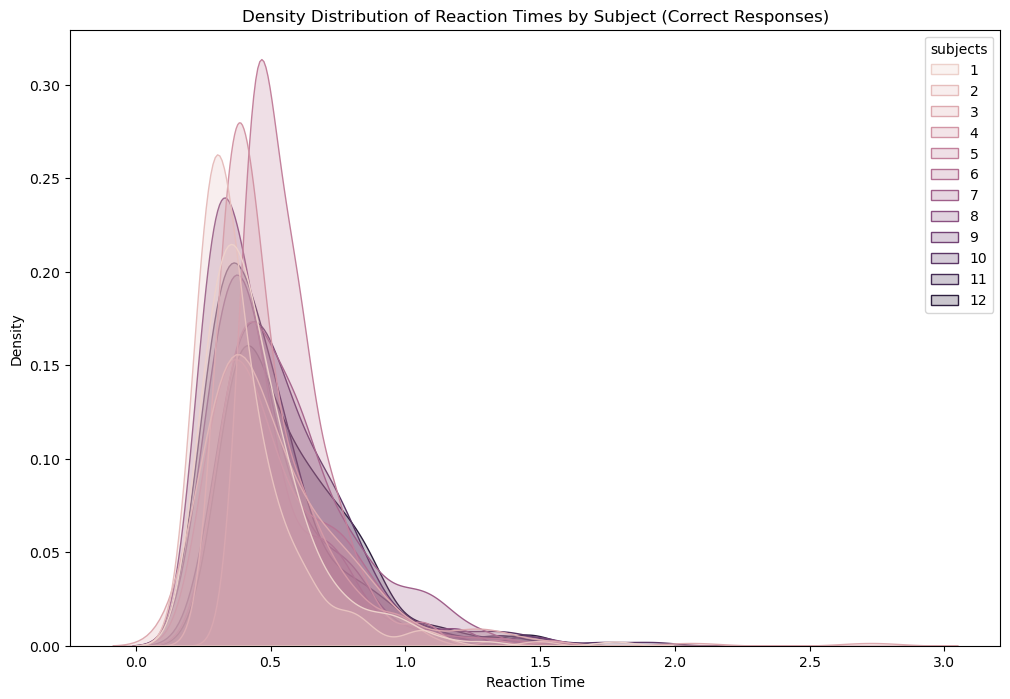

<Figure size 640x480 with 0 Axes>

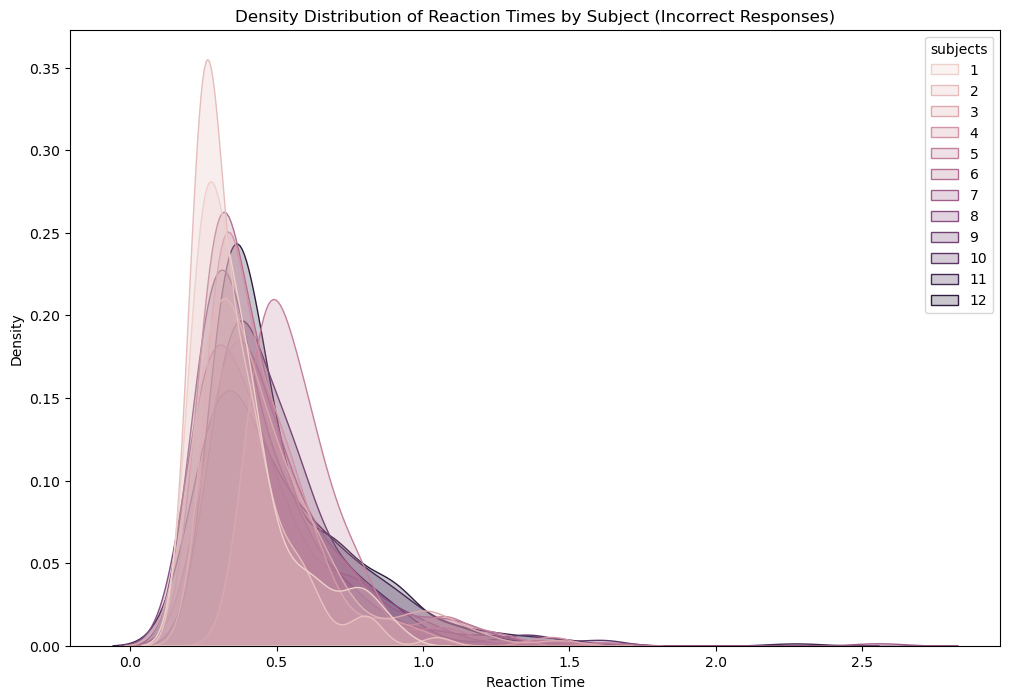

<Figure size 640x480 with 0 Axes>

In [123]:
# Filter for correct responses
correct_responses = df[df['R'] == 1]

# Filter for incorrect responses
incorrect_responses = df[df['R'] == 0]

# Plot the density distribution of reaction times by subject for correct responses
plt.figure(figsize=(12, 8))
sns.kdeplot(data=correct_responses, x='rt', hue='subjects', fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('Density Distribution of Reaction Times by Subject (Correct Responses)')
plt.show()
plt.savefig('density_distribution_by_subject_correct.png')

# Plot the density distribution of reaction times by subject for incorrect responses
plt.figure(figsize=(12, 8))
sns.kdeplot(data=incorrect_responses, x='rt', hue='subjects', fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('Density Distribution of Reaction Times by Subject (Incorrect Responses)')
plt.show()
plt.savefig('density_distribution_by_subject_incorrect.png')

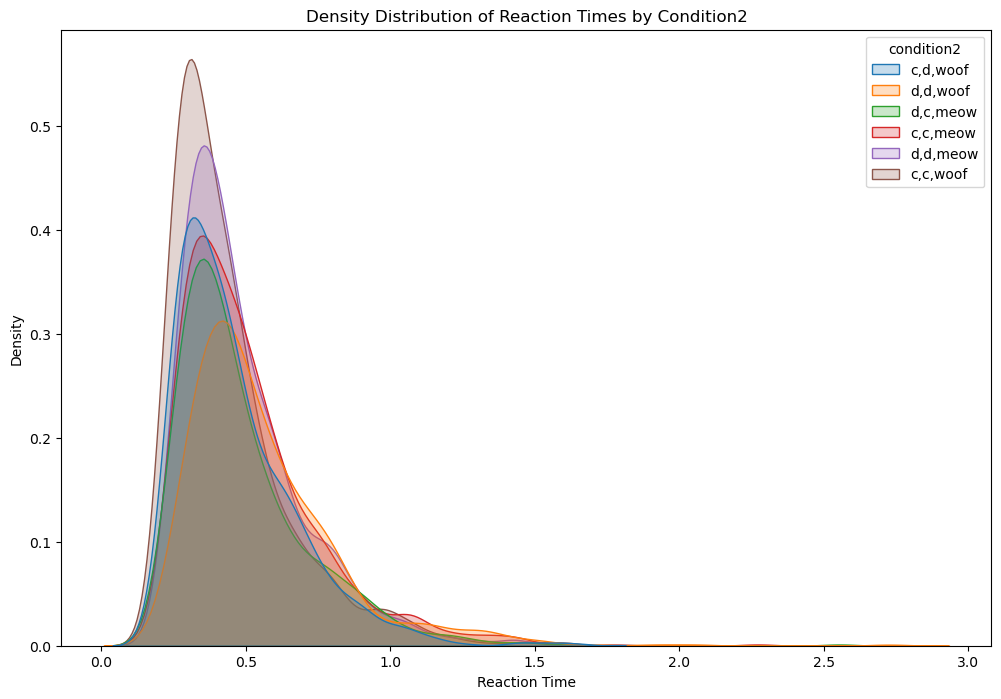

<Figure size 640x480 with 0 Axes>

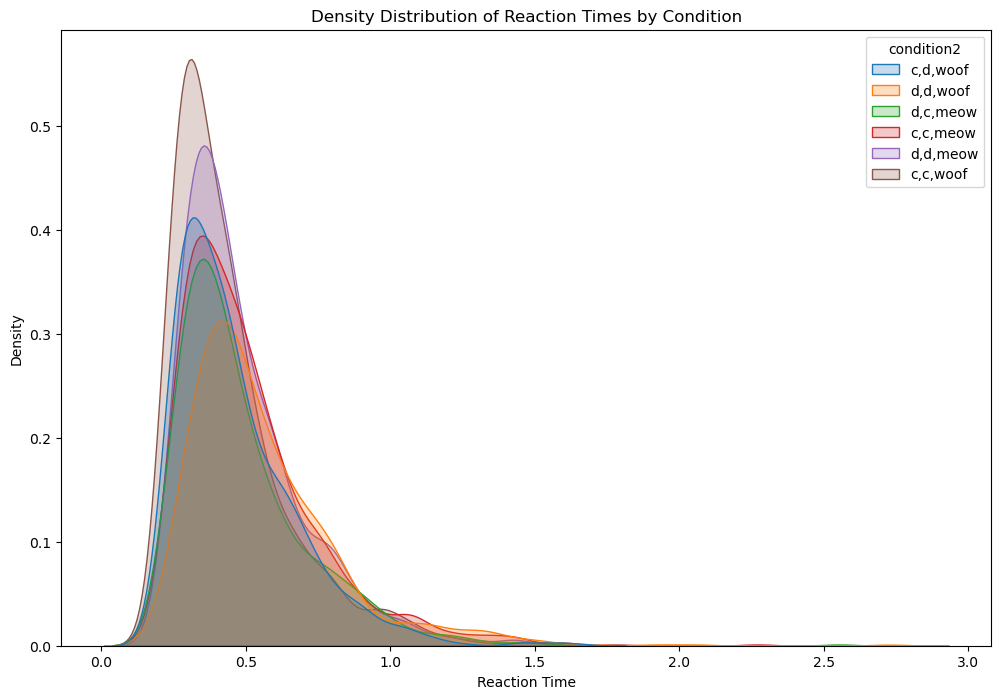

condition
S=R!=prime    2081
S=R=prime     1743
R!=S=prime    1017
S!=R=prime     679
Name: count, dtype: int64
s=cat, prime=MEOW: 1380
s=cat, prime=WOOF: 1380
s=dog, prime=MEOW: 1380
s=dog, prime=WOOF: 1380


<Figure size 640x480 with 0 Axes>

In [124]:
# Create a new column to categorize the conditions under assumption cat=dog
df['condition'] = 'Other'

# S=R=prime
df.loc[(df['prime'] == 1) & (df['R'] == 1) & (df['S'] == 1), 'condition'] = 'S=R=prime'
df.loc[(df['prime'] == 0) & (df['R'] == 0) & (df['S'] == 0), 'condition'] = 'S=R=prime'
#S=R!=prime
df.loc[(df['prime'] == 0) & (df['R'] == 1) & (df['S'] == 1), 'condition'] = 'S=R!=prime'
df.loc[(df['prime'] == 1) & (df['R'] == 0) & (df['S'] == 0), 'condition'] = 'S=R!=prime'
#R!=S=prime
df.loc[(df['prime'] == 0) & (df['R'] == 1) & (df['S'] == 0), 'condition'] = 'R!=S=prime'
df.loc[(df['prime'] == 1) & (df['R'] == 0) & (df['S'] == 1), 'condition'] = 'R!=S=prime'
#S!=R=prime
df.loc[(df['prime'] == 1) & (df['R'] == 1) & (df['S'] == 0), 'condition'] = 'S!=R=prime'
df.loc[(df['prime'] == 0) & (df['R'] == 0) & (df['S'] == 1), 'condition'] = 'S!=R=prime'



# Create a new column to categorize the conditions under assumption cat!=dog
df['condition2'] = 'Other'

# S=R=prime
df.loc[(df['prime'] == 1) & (df['R'] == 1) & (df['S'] == 1), 'condition2'] = 'd,d,woof'
df.loc[(df['prime'] == 0) & (df['R'] == 0) & (df['S'] == 0), 'condition2'] = 'c,c,meow'
#S=R!=prime
df.loc[(df['prime'] == 0) & (df['R'] == 1) & (df['S'] == 1), 'condition2'] = 'd,d,meow'
df.loc[(df['prime'] == 1) & (df['R'] == 0) & (df['S'] == 0), 'condition2'] = 'c,c,woof'
#R!=S=prime
df.loc[(df['prime'] == 0) & (df['R'] == 1) & (df['S'] == 0), 'condition2'] = 'd,c,meow'
df.loc[(df['prime'] == 1) & (df['R'] == 0) & (df['S'] == 1), 'condition2'] = 'c,d,woof'
#S!=R=prime
df.loc[(df['prime'] == 1) & (df['R'] == 1) & (df['S'] == 0), 'condition2'] = 'c,d,woof'
df.loc[(df['prime'] == 0) & (df['R'] == 0) & (df['S'] == 1), 'condition2'] = 'd,c,meow'

# Plot the density distribution of reaction times for each condition2
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='rt', hue='condition2', fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('Density Distribution of Reaction Times by Condition2')
plt.show()
plt.savefig('density_distributiontest.png')


# Plot the density distribution of reaction times for each condition under assumption that cat=dog
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='rt', hue='condition2', fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('Density Distribution of Reaction Times by Condition')
plt.show()
plt.savefig('density_distributioncat=dog.png')
# Calculate the absolute occurrences of each category for 
category_counts = df['condition'].value_counts()
print(category_counts)



# Checking if initial distribution of meow, woof, cat, dog is balanced

# Count the occurrences for each combination of 'S' and 'prime'
s_cat_prime_meow = df[(df['S'] == 0) & (df['prime'] == 0)].shape[0]
s_cat_prime_woof = df[(df['S'] == 0) & (df['prime'] == 1)].shape[0]
s_dog_prime_meow = df[(df['S'] == 1) & (df['prime'] == 0)].shape[0]
s_dog_prime_woof = df[(df['S'] == 1) & (df['prime'] == 1)].shape[0]

print(f"s=cat, prime=MEOW: {s_cat_prime_meow}")
print(f"s=cat, prime=WOOF: {s_cat_prime_woof}")
print(f"s=dog, prime=MEOW: {s_dog_prime_meow}")
print(f"s=dog, prime=WOOF: {s_dog_prime_woof}")
# The distribution is balanced




how does that make sense?



<img src="idea.png" alt="Idea" width="400"/>


In [125]:

# Create a contingency table with S, R, and prime
#contingency_table = pd.crosstab(index=[df['S'], df['R'],df['prime']], columns=[df['S'], df['R'],df['prime']])

contingency_table1 = pd.crosstab(df['S'], df['R'])
contingency_table2 = pd.crosstab(df['S'], df['prime'])
contingency_table3 = pd.crosstab(df['R'], df['prime']) #shows that there is a bias towards cats, cats been chosen more.
# Separate reaction times for cat and dog


# Calculate the percentage of cat responses per subject
cat_percentage_per_subject = df[df['R'] == 0].groupby('subjects').size() / df.groupby('subjects').size() * 100
# percentage of cat responses per subject
print("percentage of cat responses per subject:")
print(cat_percentage_per_subject)
# Perform t-test
t_stat, p_value = ttest_1samp(cat_percentage_per_subject, 0.4)
print('_________________________')
print("T-test for the percentage of cat responses per subject:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
# Display the contingency table

contingency_table3


percentage of cat responses per subject:
subjects
1     54.782609
2     56.304348
3     56.304348
4     53.260870
5     47.608696
6     60.434783
7     52.391304
8     51.086957
9     55.869565
10    53.260870
11    51.956522
12    58.043478
dtype: float64
_________________________
T-test for the percentage of cat responses per subject:
T-statistic: 54.5479
P-value: 0.0000


prime,0,1
R,,
0,1329,1667
1,1431,1093


In [ ]:
# Cleanse data

# Check for missing entries in the dataframe
missing_entries = df.isnull().sum()
# print("Missing entries in each column:")
# print(missing_entries)
#no missing entries

# Check for duplicate entries in the dataframe  
duplicate_entries = df.duplicated().sum()
#print("Number of duplicate entries in the dataframe:", duplicate_entries)
#no duplicate entries

# Check for outliers in the dataframe
outliers = df[(df['rt'] < 0.2) | (df['rt'] > 2.0)]
print("Number of outliers in the dataframe:", outliers.shape[0])
print(outliers)

# Remove outliers from the dataframe
df= df[~df.index.isin(outliers.index)]
print("Number of entries after removing outliers:", df.shape[0])
#removed 6 outliers, should be fine as it is less than 1% of the data

df.head()


Number of outliers in the dataframe: 6
      subjects  S  prime  R        rt   condition condition2
3351         3  1      1  1  2.726970   S=R=prime   d,d,woof
5511         3  1      1  1  2.060569   S=R=prime   d,d,woof
3331         7  1      0  0  2.555356  S!=R=prime   d,c,meow
2444         8  1      1  0  0.199197  R!=S=prime   c,d,woof
3020         8  1      1  0  0.199295  R!=S=prime   c,d,woof
1883        11  0      0  0  2.272151   S=R=prime   c,c,meow
Number of entries after removing outliers: 5514


,subjects,S,prime,R,rt,condition,condition2
361,1,0,1,1,0.369526,S!=R=prime,"c,d,woof"
2617,1,0,1,1,0.695785,S!=R=prime,"c,d,woof"
3013,1,1,1,1,0.749988,S=R=prime,"d,d,woof"
1117,1,1,0,0,0.372379,S!=R=prime,"d,c,meow"
2257,1,0,0,0,0.351478,S=R=prime,"c,c,meow"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyddm
from pyddm import Model, Fittable, Fitted, Sample
from pyddm.models import Drift, Noise, Bound, Overlay, LossFunction
from pyddm.functions import fit_model
from pyddm.models import ICPointSourceCenter, InitialCondition, ICUniform #ICPOINTER does not exist
from pyddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNone, OverlayNonDecision, OverlayUniformMixture
from pyddm.plot import model_gui_jupyter



In [128]:
# Prepare data for pyddm
sample = Sample.from_pandas_dataframe(df, rt_column_name="rt", correct_column_name="R")


In [129]:

# hypothesis 1: Drift depends on prime
class DriftCondition(Drift):
    name = "Drift depends on prime condition"
    required_parameters = ['v_meow', 'v_woof']  # Parameters to fit
    required_conditions = ['prime']    # Experimental conditions

    def get_drift(self,x,t, conditions, **kwargs):
        if conditions['prime'] == 0:  # MEOW
            return self.v_meow
        else:  # WOOF
            return self.v_woof



# hypothesis 2: Bound depends on prime
class BoundCondition(Bound):
    name = "Boundary depends on prime condition"
    required_parameters = ['a_meow', 'a_woof']
    required_conditions = ['prime']

    def get_bound(self, x, t, conditions, **kwargs):
        if conditions['prime'] == 0:  # MEOW
            return self.a_meow
        else:  # WOOF
            return self.a_woof



# hypothesis 3: Starting point depends on prime

class ICCondition(InitialCondition):
    name = "Starting point depends on prime condition"
    required_parameters = ['z_meow', 'z_woof']
    required_conditions = ['prime']

    def get_IC(self, x, dx, conditions, **kwargs):
        # Determine the starting point based on the condition code
        if conditions['prime'] == 0:  # MEOW
            z = self.z_meow
        else:  # WOOF
            z = self.z_woof
        
        # Create an array for the initial condition
        ic_array = np.zeros_like(x)
        
        # Find the index closest to the starting point z
        idx = np.argmin(np.abs(x - z))
        
        # Set the probability at the starting point
        ic_array[idx] = 1 / dx  # Normalize by dx to ensure total probability sums to 1
        
        return ic_array


In [130]:
# H1: Create a model with drift varying by condition
model_v = Model(name='DDM with drift varying by condition',
                drift=DriftCondition(v_meow=Fittable(minval=-3, maxval=3),
                                     v_woof=Fittable(minval=-3, maxval=3)),
                noise=NoiseConstant(noise=Fittable(minval=0.5, maxval=4.0)),
                bound=BoundConstant(B=1.0),      # Fixed bound
                overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=0.5)),
                IC=ICPointSourceCenter())  # Starting point at 0

fit_model_v = pyddm.fit_adjust_model(model=model_v, sample=sample, lossfunction=pyddm.LossRobustLikelihood, verbose=False)
model_gui_jupyter(model=model_v, sample=sample)


# H2: Create a model with boundary varying by condition
model_a = Model(name='DDM with boundary varying by condition',
                drift=DriftConstant(drift=1.0),   
                noise=NoiseConstant(noise=Fittable(minval=0.5, maxval=3.0)),
                bound=BoundCondition(a_meow=Fittable(minval=0.5, maxval=3.0),
                                    a_woof=Fittable(minval=0.5, maxval=3.0)),
                overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=0.5)),
                IC=ICPointSourceCenter())

fit_model_a = pyddm.fit_adjust_model(model=model_a, sample=sample, lossfunction=pyddm.LossRobustLikelihood, verbose=False)
model_gui_jupyter(model=model_a, sample=sample)


# H3: Create a model with starting point varying by condition
model_z = Model(name='DDM with starting point varying by condition',
                drift=DriftConstant(drift=1.0),
                noise=NoiseConstant(noise=Fittable(minval=0.5, maxval=3.0)),
                bound=BoundConstant(B=1.0),
                overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=0.5)), 
                IC=ICCondition(z_meow=Fittable(minval=-0.5, maxval=0.5),
                               z_woof=Fittable(minval=-0.5, maxval=0.5)))

fit_model_z = pyddm.fit_adjust_model(model=model_z, sample=sample, lossfunction=pyddm.LossRobustLikelihood, verbose=False)
model_gui_jupyter(model=model_z, sample=sample)




Info: Params [ 0.12086784 -0.69499565  1.77985363  0.18072838] gave 1959.3017290298328


Output()

Info: Params [3.         1.69194268 1.60846447 0.18813279] gave 2191.0389918153924


Output()

Info: Params [ 1.82798967 -0.09948081 -0.31897958  0.19678201] gave 1915.6918453735434


Output()

In [131]:
#Full model, only works for either drift or bound, not both
model_full_wo_IC = Model(name='Full DDM with all parameters varying',
                   drift=DriftCondition(v_meow=Fittable(minval=-3, maxval=3),
                                        v_woof=Fittable(minval=-3, maxval=3)),
                   noise=NoiseConstant(noise=Fittable(minval=0.5, maxval=3.0)),
                   #bound=BoundConstant(B=1.0),
                   bound=BoundCondition(a_meow=Fittable(minval=0.1, maxval=3.0),
                                        a_woof=Fittable(minval=0.1, maxval=3.0)),
                   overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=0.5)),
                   IC=ICPointSourceCenter())
                   #IC=ICCondition(z_meow=Fittable(minval=-0.5, maxval=0.5),
                                  #z_woof=Fittable(minval=-0.5, maxval=0.5)))

model_full_wo_BO = Model(name='Full DDM with all parameters varying',
                   drift=DriftCondition(v_meow=Fittable(minval=-3, maxval=3),
                                        v_woof=Fittable(minval=-3, maxval=3)),
                   noise=NoiseConstant(noise=Fittable(minval=0.5, maxval=3.0)),
                   bound=BoundConstant(B=1.0),
                   #bound=BoundCondition(a_meow=Fittable(minval=0.1, maxval=2.0),
                                        #a_woof=Fittable(minval=0.1, maxval=2.0)),
                   overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=0.5)),
                   #IC=ICPointSourceCenter())
                   IC=ICCondition(z_meow=Fittable(minval=-0.5, maxval=0.5),
                                  z_woof=Fittable(minval=-0.5, maxval=0.5)))

# Note that it is not possible to fit the full model with both bound and bias (IC) varying by condition, dependency issue or so

fit_model_full_wo_IC = pyddm.fit_adjust_model(model=model_full_wo_IC, sample=sample,  lossfunction=pyddm.LossRobustLikelihood, verbose=False)
fit_model_full_wo_BO = pyddm.fit_adjust_model(model=model_full_wo_BO, sample=sample,  lossfunction=pyddm.LossRobustLikelihood, verbose=False)
model_gui_jupyter(model=model_full_wo_IC, sample=sample)
model_gui_jupyter(model=model_full_wo_BO, sample=sample)

Info: Params [ 0.18626412 -1.03542032  2.69604272  1.54116062  1.48980889  0.18149576] gave 1954.1425158776206
Info: Params [ 0.07595715  0.25658034  1.82483233  0.01582339 -0.28243275  0.19574061] gave 1798.885697757522


Output()

Output()

In [134]:
print("Fitted parameters for full mode wo IC:")
parameters = fit_model_full_wo_IC.parameters()
for component, params in parameters.items():
    print(f"Component: {component}")
    for param_name, param_value in params.items():
        if isinstance(param_value, Fitted):  # Check if it's a fitted parameter
            print(f"  {param_name}: {param_value}")
        else:  # If it's fixed (e.g., noise)
            print(f"  {param_name}: {param_value}")

print("______________________________________________________")

print("Fitted parameters for full mode wo BO:")
parameters = fit_model_full_wo_BO.parameters()
for component, params in parameters.items():
    print(f"Component: {component}")
    for param_name, param_value in params.items():
        if isinstance(param_value, Fitted):  # Check if it's a fitted parameter
            print(f"  {param_name}: {param_value}")
        else:  # If it's fixed (e.g., noise)
            print(f"  {param_name}: {param_value}")


Fitted parameters for full mode wo IC:
Component: drift
  v_meow: Fitted(0.18626412064455014, minval=-3, maxval=3)
  v_woof: Fitted(-1.0354203209156698, minval=-3, maxval=3)
Component: noise
  noise: Fitted(2.6960427160207177, minval=0.5, maxval=3.0)
Component: bound
  a_meow: Fitted(1.541160617950862, minval=0.1, maxval=3.0)
  a_woof: Fitted(1.4898088855349982, minval=0.1, maxval=3.0)
Component: IC
Component: overlay
  nondectime: Fitted(0.18149575814830093, minval=0.1, maxval=0.5)
______________________________________________________
Fitted parameters for full mode wo BO:
Component: drift
  v_meow: Fitted(0.07595714652227939, minval=-3, maxval=3)
  v_woof: Fitted(0.2565803355722525, minval=-3, maxval=3)
Component: noise
  noise: Fitted(1.8248323268947417, minval=0.5, maxval=3.0)
Component: bound
  B: 1.0
Component: IC
  z_meow: Fitted(0.015823388903928204, minval=-0.5, maxval=0.5)
  z_woof: Fitted(-0.2824327529179773, minval=-0.5, maxval=0.5)
Component: overlay
  nondectime: Fitted(

In [139]:
def compute_aic(fit_result, num_params):
    likelihood = -fit_result.fitresult.value()
    aic = 2 * num_params - 2 * likelihood
    return aic

# Number of parameters in each model
num_params_v = 2  # v_meow, v_woof
num_params_a = 2  # a_meow, a_woof
num_params_z = 2  # z_meow, z_woof
num_params_full = 4  # v_meow, v_woof, a_meow, a_woof, z_meow, z_woof

aic_v = compute_aic(fit_model_v, num_params_v)
aic_a = compute_aic(fit_model_a, num_params_a)
aic_z = compute_aic(fit_model_z, num_params_z)
aic_full_wo_IC = compute_aic(fit_model_full_wo_IC, num_params_full)
aic_full_wo_BO = compute_aic(fit_model_full_wo_BO, num_params_full)

print(f"AIC for model_v: {aic_v:.2f}")
print(f"AIC for model_a: {aic_a:.2f}")
print(f"AIC for model_z: {aic_z:.2f}")
print(f"AIC for model_full with IC static: {aic_full_wo_IC:.2f}")
print(f"AIC for model_full with Boundaries static: {aic_full_wo_BO:.2f}")



def compute_bic(fit_result, num_params, num_data_points):
    # Compute log-likelihood
    likelihood = -fit_result.fitresult.value()
    # Compute BIC
    bic = num_params * np.log(num_data_points) - 2 * likelihood
    return bic

# Number of data points in your sample
num_data_points = len(sample)

# Compute BIC for each model
bic_v = compute_bic(fit_model_v, num_params_v, num_data_points)
bic_a = compute_bic(fit_model_a, num_params_a, num_data_points)
bic_z = compute_bic(fit_model_z, num_params_z, num_data_points)
bic_full_wo_IC = compute_bic(fit_model_full_wo_IC, num_params_full, num_data_points)
bic_full_wo_BO = compute_bic(fit_model_full_wo_BO, num_params_full, num_data_points)

print(f"BIC for model_v: {bic_v:.2f}")
print(f"BIC for model_a: {bic_a:.2f}")
print(f"BIC for model_z: {bic_z:.2f}")
print(f"BIC for model_full with IC static: {bic_full_wo_IC:.2f}")
print(f"BIC for model_full with Boundaries static: {bic_full_wo_BO:.2f}")



AIC for model_v: 3922.60
AIC for model_a: 4386.08
AIC for model_z: 3835.38
AIC for model_full with IC static: 3916.29
AIC for model_full with Boundaries static: 3605.77
BIC for model_v: 3935.83
BIC for model_a: 4399.31
BIC for model_z: 3848.61
BIC for model_full with IC static: 3942.75
BIC for model_full with Boundaries static: 3632.23


# RESULTS 
It can be observed that model 1 and 3 are performing best. 
Maybe mix of both because, 3600/3626 is pretty good. 
But cannot really be interpreted clearly. rather-> trade-off between simple model vs complex model and better performance. 
More experiments required, I guess. 

Is there a way to find out @lecturer?

2 does not really make sense, because the noise is at max and continues growing to max, whereas the noise is at 1.9/1.8 for the other models, 